this file explore the dataset and highlights possible thematic maps
also tries shp to project dataset on 

In [77]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from shapely import wkt


d = 'C:/Users/fabrizio/Documents/repos/MSC/output/oebo.csv'

df=pd.read_csv(d)


df['geometry'] = df['geometry'].apply(wkt.loads) #read geometry column
gdf = geopandas.GeoDataFrame(df, crs='WGS84')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
austria=world[world['name']=='Austria']

#gdf.plot(color='red', ax=austria.plot())
#plt.show()

In [78]:
no_nitr=gdf[gdf.NITRIFIZIERUNG=='n']


In [79]:
#no_nitr.plot(color='red', ax=austria.plot())


In [80]:
bezirke=geopandas.read_file(r'C:\Users\fabrizio\Documents\repos\MSC\DATA\Sacken\shp\OGDEXT_POLBEZ_1_STATISTIK_AUSTRIA_20200101\STATISTIK_AUSTRIA_POLBEZ_20200101Polygon.shp')

In [81]:
bezirke.to_crs(epsg='4326', inplace=True)

In [82]:
#fig, ax = plt.subplots(figsize = (10,10))
#bezirke.plot(ax=ax)
#no_nitr.plot(color='red', markersize=1 ,ax=ax, alpha=1)
#ax.set(title='distribution of illegal stuff'.title())


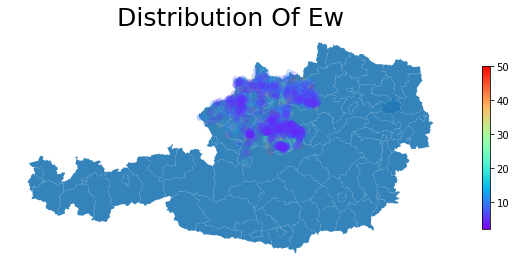

In [83]:
fig, ax = plt.subplots(1,figsize = (10,10))
bezirke.plot(ax=ax, alpha=.9)
gdf.plot(column='EW60', cmap='rainbow', legend=True, legend_kwds={'shrink':0.3}, ax=ax, alpha=.1)
ax.set_title('distribution of EW'.title(), fontsize=25)
ax.set_axis_off()


In [84]:
gdf=gdf[['BEZIRK', 'ANLAGENAME','EW60',
       'INBETRIEBNAHME','VERFAHRENSART BIOLOGIE',
       'REINIGUNG MECHANISCH', 'C-ENTFERNUNG', 'NITRIFIZIERUNG',
       'N-ENTFERNUNG', 'P-ENTFERNUNG','Verfahren', 'Typ','geometry']]
       

In [85]:
#import shp of KG
geo=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
geo.KG_NR=geo.KG_NR.astype(int)
geo.to_crs(epsg=4326,inplace=True)

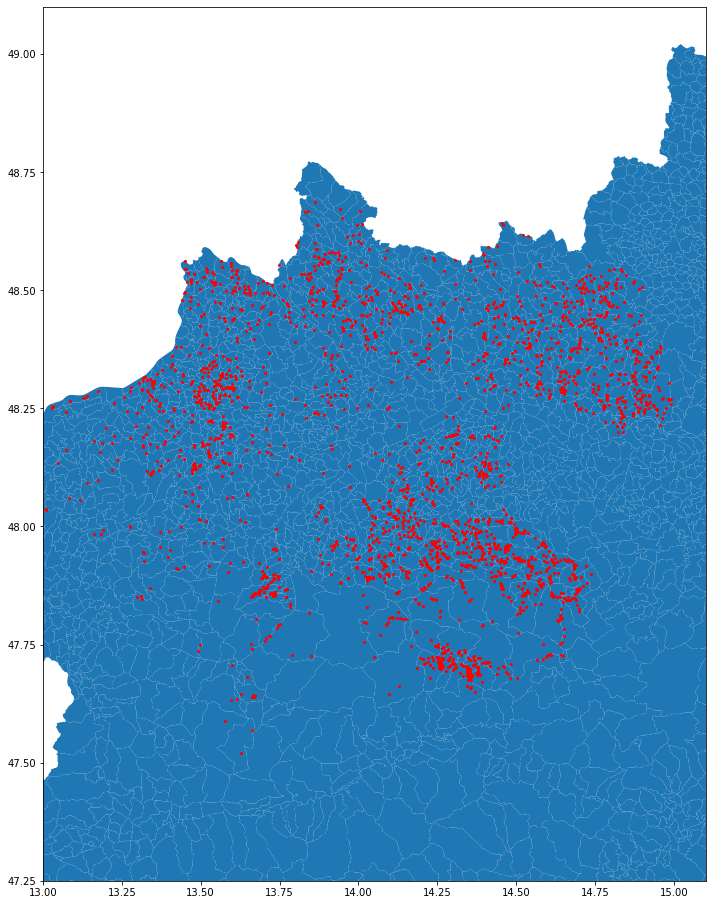

In [86]:
#check if everything fine
#define figure and axes
fig,ax=plt.subplots(1,figsize=(10,15))
#get background
geo.plot(ax=ax)
#zoom In
ax.set_xlim(13,15.1)
ax.set_ylim(47.25,49.1)
#get points
gdf.plot(color='red',ax=ax, markersize=4)
#extra
plt.tight_layout()

In [87]:
geoOO=geo[geo.BL=='Oberösterreich']
type(geoOO)

geopandas.geodataframe.GeoDataFrame

In [129]:
#spatial koin. get point in polygons
test=geopandas.sjoin(geoOO,gdf, how='inner')
test.INBETRIEBNAHME=test.INBETRIEBNAHME.str.slice(0,4)
test=test[test.INBETRIEBNAHME!='<NUL']
test.INBETRIEBNAHME=test.INBETRIEBNAHME.astype(int)





In [134]:
#extract data
test['freq'] = test.groupby('KG_NR')['KG_NR'].transform('count')
test['sum_EW']=test.groupby('KG_NR')['EW60'].transform('sum')
test['average_baujahr']=test.groupby('KG_NR')['INBETRIEBNAHME'].transform('mean').astype(int)

In [135]:
#each row is a KG, with freq and sumEW
uniques=test.drop_duplicates(subset='KG_NR')
uniques=uniques[['KG_NR', 'KG', 'freq', 'sum_EW','average_baujahr','geometry']]
uniques

,KG_NR,KG,freq,sum_EW,average_baujahr,geometry
2,51006,Fierling,8,102,2007,"POLYGON ((14.15137 48.05530, 14.15132 48.05536..."
6,45027,Scharten,2,9,1960,"POLYGON ((14.05901 48.25177, 14.05857 48.25155..."
10,50010,Freudenthal,2,70,2008,"POLYGON ((13.39690 47.92192, 13.39621 47.92211..."
20,45616,Mühllacken,1,50,2006,"POLYGON ((14.04805 48.37897, 14.04817 48.37902..."
39,45320,Harmannsdorf,2,20,1991,"POLYGON ((14.33433 48.12325, 14.33405 48.12339..."
...,...,...,...,...,...,...
7796,43111,St. Georgen an der Gusen,1,6,2011,"POLYGON ((14.46054 48.28146, 14.46051 48.28150..."
7804,40207,Hartberg,1,5,2001,"POLYGON ((13.06397 48.14910, 13.06396 48.14909..."
7811,42124,Kampesberg,2,46,2009,"POLYGON ((13.89386 47.95186, 13.89373 47.95200..."
7822,46017,Kramberg,2,11,2003,"POLYGON ((13.47897 48.30079, 13.47884 48.30081..."


In [ ]:
#merge together with geometry
#to_map=pd.merge(geo,uniques ,on='KG_NR')
#to_map=to_map[['KG_NR','freq', 'sum_EW','geometry']]

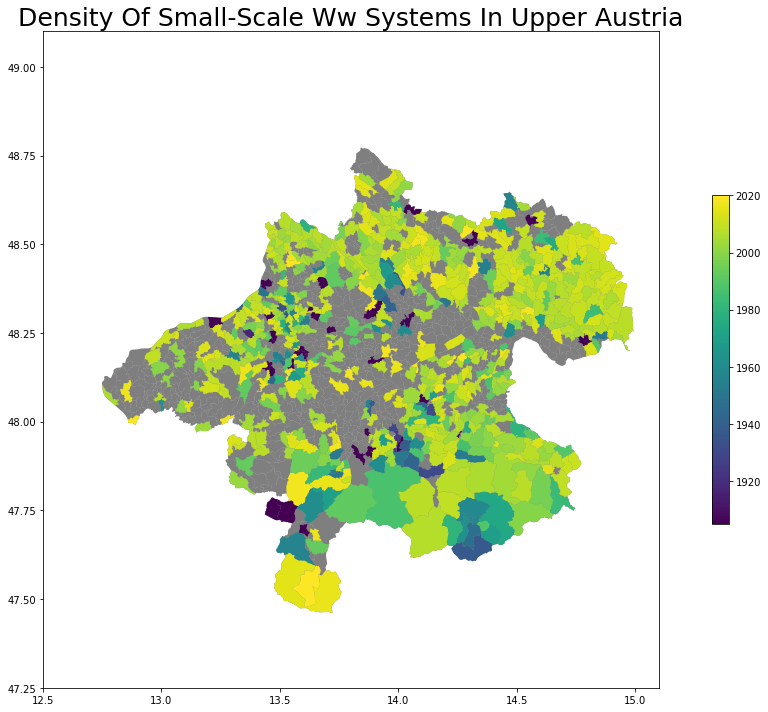

In [136]:
#plot it
fig,ax=plt.subplots(1,figsize=(15,10))
geoOO.plot(ax=ax, color='black', alpha=0.5)
ax.set_xlim(12.5,15.1)
ax.set_ylim(47.25,49.1)
uniques.plot(column='average_baujahr',ax=ax,legend=True,legend_kwds={'shrink': 0.5,'orientation':'vertical'})
ax.set_title('density of small-scale ww systems in upper Austria'.title(),fontdict={'fontsize':25})
plt.tight_layout()
plt.savefig('output/oo.png')

<AxesSubplot:>

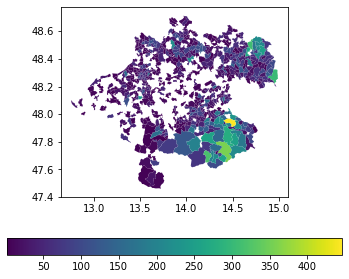

In [ ]:
#plot other column
fig,ax=plt.subplots(1,figsize=(20,5))
uniques.plot(column='sum_EW',ax=ax,legend=True,legend_kwds={'shrink': 0.3,'orientation':'horizontal'})


In [ ]:
#save to shp. this works. creates extrafolder
to_map.to_file('output/retry.shp')